In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv('./train.csv')

In [2]:
df.shape

(1306122, 3)

In [3]:
df.drop_duplicates(inplace=True)
df.shape

(1306122, 3)

In [4]:
df.columns

Index(['qid', 'question_text', 'target'], dtype='object')

In [5]:
df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [6]:
#正负样本比例15:1 
df['target'].value_counts()

0    1225312
1      80810
Name: target, dtype: int64

In [7]:
#统计词频分布
word2count_dct = {}
for sentence in df['question_text']:
    sentence = sentence.replace('?', ' ?')
    for w in sentence.split():
        if w not in word2count_dct:
            word2count_dct[w] = 1
        else:
            word2count_dct[w] +=1

In [8]:
len(word2count_dct)

435932

In [9]:
word2count_dct = dict(sorted(word2count_dct.items(), key=lambda x:x[1], reverse=True))

In [10]:
print(list(word2count_dct.items())[:20])

[('?', 1379527), ('the', 653976), ('What', 417900), ('to', 404898), ('a', 402736), ('in', 364927), ('is', 332709), ('of', 332359), ('I', 306568), ('How', 262429), ('and', 252005), ('are', 213310), ('do', 211943), ('for', 200945), ('you', 192768), ('Why', 144697), ('it', 131072), ('can', 123852), ('Is', 108892), ('that', 105482)]


In [11]:
df['q_len'] = df['question_text'].apply(lambda x: len(x.split()))

In [12]:
#构建train和test
df_pos = df.where(df['target']==1).dropna(axis=0).sample(frac=1)
df_neg = df.where(df['target']==0).dropna(axis=0).sample(frac=1)

In [13]:
df_neg.head()

,qid,question_text,target,q_len
918816,b40d4082c706b2aa78dc,What treatment can someone get if he or she ha...,0.0,12.0
77377,0f25ad87aa946d25458a,Is the African Union doing enough about the sl...,0.0,13.0
164914,203bbd7ffbd1092c8cab,Why India is secular?,0.0,4.0
967868,bda0d9fc6a8c079fa024,"""Confidence is not based on your actual abilit...",0.0,28.0
203479,27c5921f1605b897dd9e,Is there any way in which how I can improve my...,0.0,13.0


In [14]:
df_neg.describe()

,target,q_len
count,1225312.0,1.225312e+06
mean,0.0,1.250853e+01
std,0.0,6.750694e+00
min,0.0,2.000000e+00
25%,0.0,8.000000e+00
50%,0.0,1.100000e+01
75%,0.0,1.500000e+01
max,0.0,1.340000e+02


In [15]:
df_pos.describe()

,target,q_len
count,80810.0,80810.000000
mean,1.0,17.277812
std,0.0,9.568309
min,1.0,1.000000
25%,1.0,10.000000
50%,1.0,15.000000
75%,1.0,23.000000
max,1.0,64.000000


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

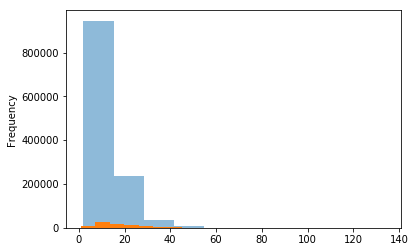

In [17]:
fig, ax = plt.subplots()
df_neg['q_len'].plot(kind='hist', ax=ax, alpha=.5)
df_pos['q_len'].plot(kind='hist', ax=ax)

可见question长度对类别区分不强

In [18]:
len(word2count_dct)

435932

In [20]:
word2poscount_dct = {w: 0 for w, _ in word2count_dct.items()}
word2negcount_dct = {w: 0 for w, _ in word2count_dct.items()}
for line, target in zip(df['question_text'], df['target']):
    for w in line.split():
        if int(target):
            if w not in word2poscount_dct:
                word2poscount_dct[w] = 1
            else:
                word2poscount_dct[w] += 1
        else:
            if w not in word2negcount_dct:
                word2negcount_dct[w] = 1
            else:
                word2negcount_dct[w] += 1

In [23]:
pos_num, neg_num = df_pos.shape[0], df_neg.shape[0]

In [25]:
word2poscount_dct = {w: c/pos_num for w, c in word2poscount_dct.items()}
word2negcount_dct = {w: c/neg_num for w, c in word2negcount_dct.items()}

In [26]:
word2poscount_dct['are']

0.22812770696695953

In [27]:
word2negcount_dct['are']

0.15855471912459848

In [28]:
word_lst = list(word2count_dct.keys())
df_wfreq = pd.DataFrame({'word':word_lst,
                        'pos':[word2poscount_dct[w] for w in word_lst],
                        'neg':[word2negcount_dct[w] for w in word_lst]})

In [30]:
df_wfreq.head(20)

,word,pos,neg
0,?,0.003750,0.000882
1,the,0.634191,0.491874
2,What,0.075560,0.335993
3,to,0.441901,0.299902
4,a,0.330368,0.306848
5,in,0.252543,0.279703
6,is,0.232607,0.255323
7,of,0.305123,0.249869
8,I,0.139042,0.240775
9,How,0.092934,0.207637


In [37]:
#diff 是某个单词再正类pos和负类neg里的词频差（经过归一化）
df_wfreq['diff'] = df_wfreq.apply(lambda row: np.abs(row['pos']-row['neg']), axis=1)

In [39]:
df_wfreq.sort_values(by=['diff'], inplace=True, ascending=False)

In [42]:
df_wfreq.head(200)

,word,pos,neg,diff
15,Why,0.404319,0.089461,0.314857
2,What,0.075560,0.335993,0.260433
10,and,0.348558,0.182652,0.165906
1,the,0.634191,0.491874,0.142317
3,to,0.441901,0.299902,0.141999
19,that,0.194407,0.071635,0.122772
9,How,0.092934,0.207637,0.114703
47,they,0.138646,0.024095,0.114551
35,people,0.134501,0.030562,0.103939
8,I,0.139042,0.240775,0.101733


1、发现why、how、what在两个类的差异很大，其中pos里经常出现why，直觉上pos类的提问方式大部分有why，是后面可以尝试的一个特征（停用词表里不要去除，一开始我其实想把why、what这些都当作停用词去掉了！！！）

2、问好‘？’虽然词频很高，但pos和neg里都经常出现，所以是不是问句感觉不具分辨力

In [47]:
#抽样，pos里确实经常有why这个词
df_pos.sample(30)

,qid,question_text,target,q_len
314010,3d87da36071eabeab78d,The homeless and the blacks in the projects? O...,1.0,23.0
558795,6d7c863a8f37a74125a9,Is consensual incest sex with mother & sister ...,1.0,12.0
852182,a6f7d04aba2c0e27a3ad,Does Donald Trump have a brain?,1.0,6.0
348288,443f79332c4101972c5e,Why do Jews believe they have a right to the l...,1.0,13.0
683452,85dbe7f2bb894357d131,My daughter has been fooling around. She is 8....,1.0,16.0
1209814,ed1ebe5f88b1bbcbbd56,Why do devout Christians use medical care inst...,1.0,16.0
624729,7a561e001343e361b89b,Why do Arabs hate Israelis?,1.0,5.0
888276,ae081824ff54efec65db,Why is everyone so rude against black people i...,1.0,12.0
731286,8f3733020870bde8a45d,Do conservatives want religious freedom to inc...,1.0,23.0
491570,60436f19efb06208e371,Why do the majority of males hit on clubbing g...,1.0,15.0


In [44]:
df_neg.sample(30)

,qid,question_text,target,q_len
130188,1977d8cabea604c7eadc,Is third degree torture given to suspects lega...,0.0,18.0
1193691,e9f27255df2e13b74e34,How much time taken by reach percel speed post...,0.0,12.0
809321,9e99a112aa8e73be97ec,What would the stock market look like the foll...,0.0,21.0
823342,a155e4de230dbbc129df,What are the different applications of tetrabr...,0.0,7.0
100652,13b600b7c5241b166b08,How can I rid myself of the resent I feel towa...,0.0,27.0
463998,5ad9d92b6e3be377a8b1,For the students who have been shortlisted for...,0.0,17.0
389466,4c4a2eee819ad0b22e65,What are ways of developing educational resear...,0.0,8.0
427670,53d25470037d5c6436bf,How do you share a Quora blog with your follow...,0.0,28.0
33285,06849935c0875edcc8a6,What makes a Martin Lynx compound bow differen...,0.0,11.0
849606,a6767eb70a7316a51cfe,What would the lifestyle of a digital nomad in...,0.0,16.0
